In [ ]:
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def load_dataset_from_file(filename):
    data = np.load(filename)
    return data['images'], data['labels']

In [ ]:
data = "/content/drive/MyDrive/Cognitive Neurology/Dataset/dataset.npz"

loaded_images, loaded_labels = load_dataset_from_file(data)

In [ ]:
images=np.array(loaded_images)
labels = np.array(loaded_labels)

In [ ]:
images.shape

(1411, 256, 256, 3)

In [ ]:
unique,counts = np.unique(labels,return_counts = True)
unique,counts

(array(['CataractEye', 'NormalEye'], dtype='<U11'), array([673, 738]))

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

labels=le.fit_transform(labels)

In [ ]:
images.shape

(1411, 256, 256, 3)

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_temp,y_train,y_temp = train_test_split(images,labels,test_size=0.2,random_state=42)
X_test,X_val,Y_test,Y_val = train_test_split(x_temp,y_temp,test_size=0.5,random_state=42)

In [ ]:
x_train.shape, y_train.shape,x_temp.shape,y_temp.shape,X_val.shape,Y_val.shape

((1128, 256, 256, 3),
 (1128,),
 (283, 256, 256, 3),
 (283,),
 (142, 256, 256, 3),
 (142,))

[]

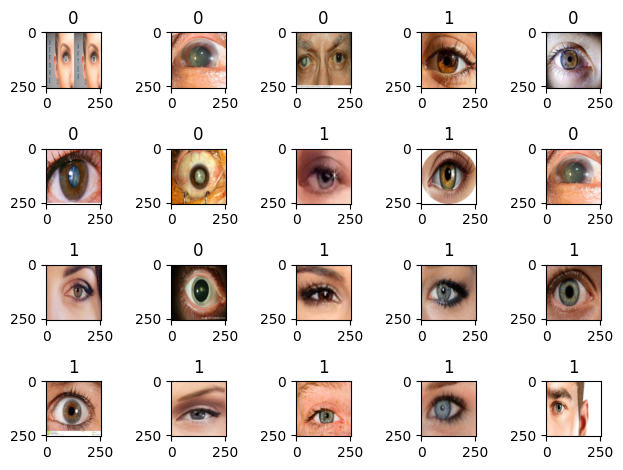

In [ ]:
import matplotlib.pyplot as plt
import random
import cv2 as cv
for i in range(1,21):
    randomindex = random.randint(0,len(x_train))
    plt.subplot(4,5,i)
    plt.imshow(cv.cvtColor(x_train[randomindex],cv.COLOR_BGR2RGB))
    plt.title(y_train[randomindex])
plt.tight_layout()
plt.plot()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models

In [ ]:
from tensorflow.keras import models, layers, regularizers

model = models.Sequential()

# Convolutional Block 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3), kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Convolutional Block 2
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Flatten before passing to the dense layers
model.add(layers.Flatten())

# Dense layers with L2 regularization and dropout
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.5))

# Output Layer for binary classification
model.add(layers.Dense(2, activation='softmax'))

# print the model summary
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 64)        0

In [ ]:
# Compile the model before training
# The optimizer is set to 'adam', the loss function is set to SparseCategoricalCrossentropy, and the metric is set to 'accuracy'
# SparseCategoricalCrossentropy is used when the classes are mutually exclusive (each entry in a batch is exactly one class)
model.compile(optimizer= "adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

# Train the model for 10 epochs using the training data
# The validation data is used to evaluate the loss and any model metrics at the end of each epoch
# The results are stored in the 'history' variable for later use
history = model.fit(
    x_train,y_train,epochs = 100, validation_data = (X_val,Y_val)
)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


36/36 [==============================] - 163s 4s/step - loss: 3.9877 - accuracy: 0.5284 - val_loss: 2.0120 - val_accuracy: 0.4577
Epoch 2/100
36/36 [==============================] - 152s 4s/step - loss: 1.6323 - accuracy: 0.5931 - val_loss: 1.3347 - val_accuracy: 0.6408
Epoch 3/100
36/36 [==============================] - 152s 4s/step - loss: 1.1926 - accuracy: 0.7128 - val_loss: 1.0204 - val_accuracy: 0.7535
Epoch 4/100
36/36 [==============================] - 149s 4s/step - loss: 1.0519 - accuracy: 0.7261 - val_loss: 0.9364 - val_accuracy: 0.7465
Epoch 5/100
36/36 [==============================] - 158s 4s/step - loss: 0.9375 - accuracy: 0.7447 - val_loss: 0.8213 - val_accuracy: 0.8239
Epoch 6/100
 2/36 [>.............................] - ETA: 2:00 - loss: 0.9927 - accuracy: 0.6719

KeyboardInterrupt: ignored

In [ ]:
# print the model summary
model.summary()
# Save the model in h5 format
model.save("Eyeclassification.h5")
# Save the model weights
model.save_weights("Eyeclassification_weights.h5")
import pickle
with open('training_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)


In [ ]:
history.history

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracu Over epochs")
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Over epochs")
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


5/5 - 4s - loss: 0.5103 - accuracy: 0.8936 - 4s/epoch - 865ms/step
Test Accuracy: 89.36%
5/5 [==============================] - 6s 1s/step
Classification Report:
               precision    recall  f1-score   support

 CataractEye       0.86      0.90      0.88        62
   NormalEye       0.92      0.89      0.90        79

    accuracy                           0.89       141
   macro avg       0.89      0.89      0.89       141
weighted avg       0.89      0.89      0.89       141



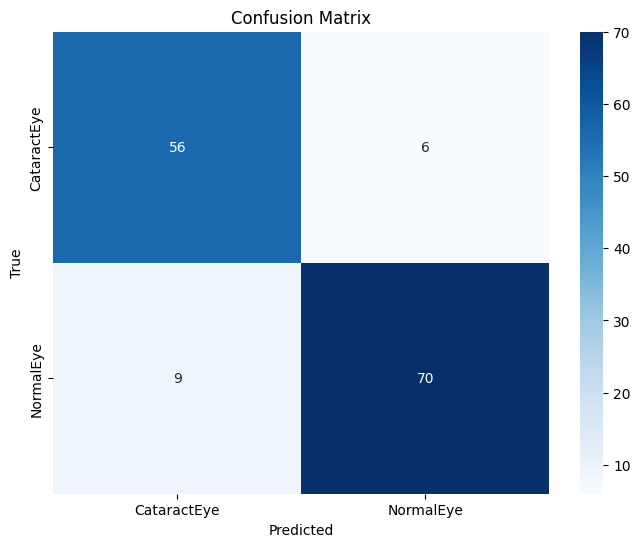

FileNotFoundError: ignored

In [ ]:
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model("/content/drive/MyDrive/Eyeclassification.h5")

# Evaluate the model on the testing data
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

# Predictions on testing data
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Convert one-hot encoded labels back to original labels
predicted_labels_original = le.inverse_transform(predicted_labels)
true_labels_original = le.inverse_transform(Y_test)

# Classification Report
classification_rep = classification_report(true_labels_original, predicted_labels_original)
print("Classification Report:\n", classification_rep)

# Confusion Matrix
cm = confusion_matrix(true_labels_original, predicted_labels_original)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot training history
with open('training_history.pkl', 'rb') as file:
    history = pickle.load(file)

plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


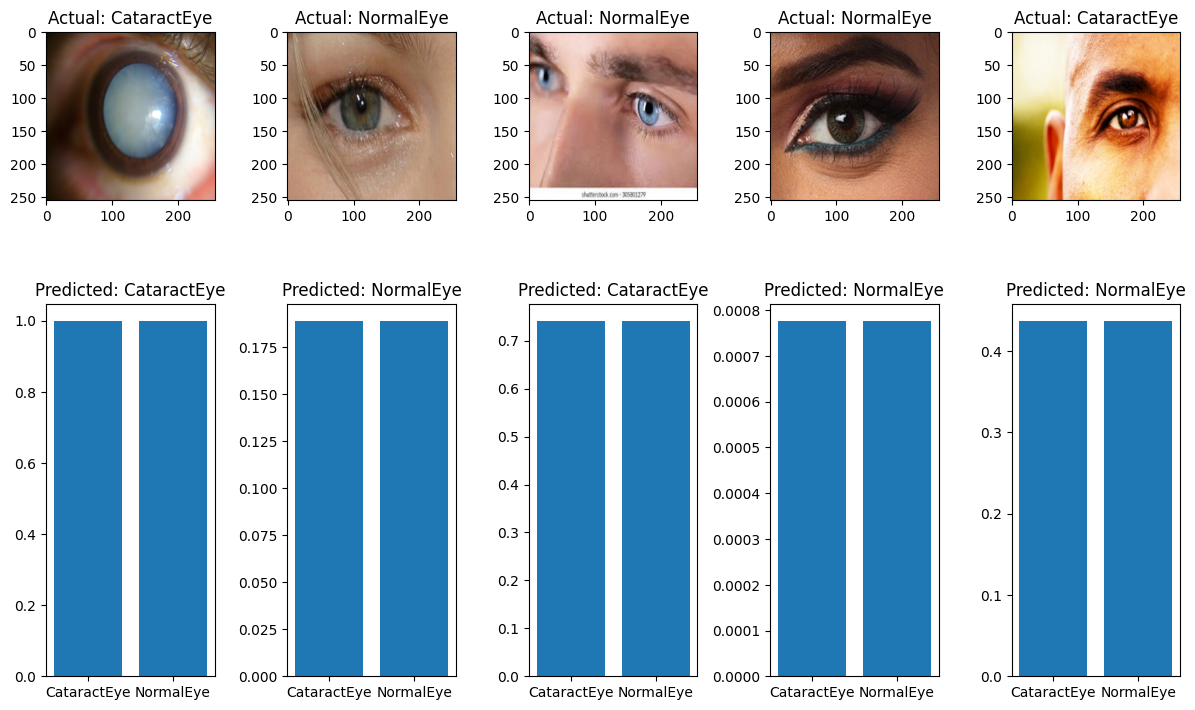

In [ ]:
import random
import matplotlib.pyplot as plt

# Choose a random sample of images
num_images_to_plot = 5
random_indices = random.sample(range(len(X_test)), num_images_to_plot)

# Plot the images with their predicted and actual labels
plt.figure(figsize=(12, 8))
for i, index in enumerate(random_indices, 1):
    plt.subplot(2, num_images_to_plot, i)
    plt.imshow(cv.cvtColor(X_test[index], cv.COLOR_BGR2RGB))
    plt.title(f"Actual: {true_labels_original[index]}")

    plt.subplot(2, num_images_to_plot, i + num_images_to_plot)

    # Assuming predictions[index] is a 2D array
    plt.bar(range(len(le.classes_)), predictions[index][0])  # Use the first row
    plt.xticks(range(len(le.classes_)), le.classes_)
    plt.title(f"Predicted: {predicted_labels_original[index]}")

plt.tight_layout()
plt.show()
